# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Viviana Purba
- **Email:** 22082010152@student.upnjatim.ac.id
- **ID Dicoding:** Viviana Purba

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren rental sepeda pada tahun 2011-2012?
- Pertanyaan 2 : Bagaimana total sepeda yang dirental berubah sepanjang hari dalam seminggu?
- Pertanyaan 3 : Apakah ada perbedaan dalam perilaku penggunaan rental sepeda antara antara hari libur dan hari biasa?
- Pertanyaan 4 : Bagaimana perbedaan musim dan jam harian mempengaruhi total rental sepeda?
- Pertanyaan 5 : Bagaimana suhu mempengaruhi banyaknya sepeda yang dirental?


## Import Semua Packages/Library yang Digunakan

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [72]:
#from google.colab import drive
#drive.mount('/content/drive')

In [106]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [74]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- nama dan isi kolom pada kedua file hampir sama, bedanya adalah di hour.csv ada kolom "hr"
- beberapa kolom perlu di-rename agar lebih mudah dipahami


### Assessing Data

### Menilai tabel day_df

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




*   Tipe data 'dteday' seharusnya datetime
*   Tipe data 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' seharusnya categorical







In [76]:
# Cek Duplikasi
print("Jumlah duplikasi tabel day_df: ", day_df.duplicated().sum())

Jumlah duplikasi tabel day_df:  0


In [77]:
# Cek Statistik Deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [78]:
# cek outlier
numeric_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(day_df[col]))
    outliers = z_scores > 3
    print(f"Outliers in {col}: {outliers.sum()}")

Outliers in temp: 0
Outliers in atemp: 0
Outliers in hum: 2
Outliers in windspeed: 2
Outliers in casual: 8
Outliers in registered: 0
Outliers in cnt: 0


<Axes: xlabel='casual'>

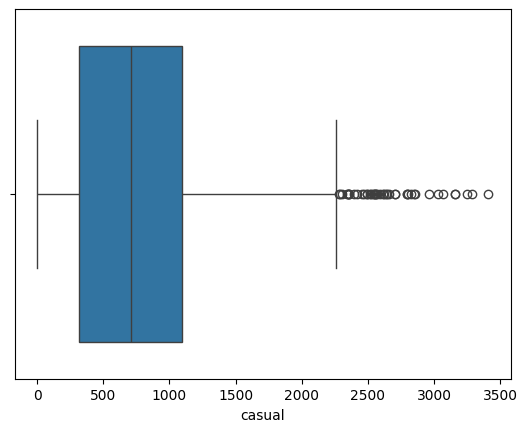

In [79]:
# melihat outlier dengan visualisasi
sns.boxplot(x=day_df['casual'])



*   Outliers tidak banyak, tidak terlalu berpengaruh pada hasil



### Menilai tabel hour_df

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   Tipe data dteday seharusnya datetime
*   Tipe data 'season', 'yr', 'mnth', 'he', 'holiday', 'weekday', 'workingday', dan 'weathersit' seharusnya categorical






In [81]:
# cek duplikasi
print("Jumlah duplikasi tabel hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi tabel hour_df:  0


In [82]:
# cek statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [83]:
# cek outlier
numeric_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(hour_df[col]))
    outliers = z_scores > 3
    print(f"Outliers in {col}: {outliers.sum()}")

Outliers in temp: 0
Outliers in atemp: 1
Outliers in hum: 22
Outliers in windspeed: 107
Outliers in casual: 467
Outliers in registered: 371
Outliers in cnt: 244


<Axes: xlabel='casual'>

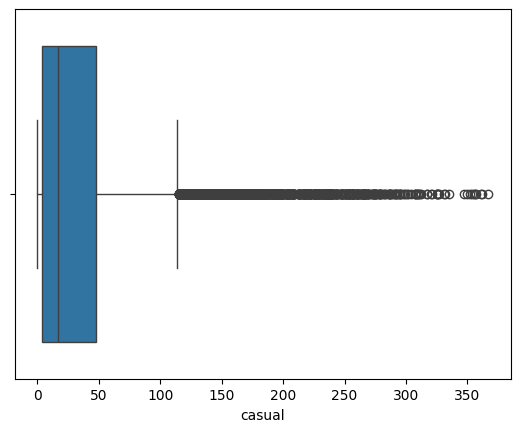

In [84]:
# melihat outlier dengan visualisasi
sns.boxplot(x=hour_df['casual'])



*   Outlier termasuk sedikit dari total data keseluruhan dan nilai tiap outlier masih berdekatan sehingga tidak terlalu berpengaruh



**Insight:**
- tidak ditemukan missing value pada kedua data
- tidak ditemukan duplikasi pada data
- ada sedikit outlier, tetapi tidak terlalu berpengaruh

## Cleaning Data

### Menghapus tabel yang tidak relevan

In [85]:
day_df= day_df.drop(columns=['weathersit', 'windspeed', 'atemp', 'hum', "workingday"])
hour_df= hour_df.drop(columns=['weathersit', 'windspeed', 'atemp', 'hum', "workingday"])

### Melakukan rename kolom di tabel day_df dan hour_df

In [86]:
both_df = [day_df, hour_df]
for df in both_df:
    df.rename(columns={ 'instant':'rec_id',
                        'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'cnt':'total_count'
                       }, inplace=True)
    if 'hr' in df.columns:
        df.rename(columns={'hr':'hour'}, inplace=True)

### Mengubah tipe data di tabel day_df dan hour_df

In [87]:
both_df = [day_df, hour_df]
for df in both_df:
    categorical_columns = ["season", "year", "month", "holiday", "weekday"]
    datetime_column = ["date"]
    if 'hr' in df.columns:
        categorical_columns.append("hr")
    df[categorical_columns] = df[categorical_columns].astype("category")
    df[datetime_column] = df[datetime_column].apply(pd.to_datetime)

In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   temp         731 non-null    float64       
 8   casual       731 non-null    int64         
 9   registered   731 non-null    int64         
 10  total_count  731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(1), int64(4)
memory usage: 39.1 KB


In [89]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   temp         17379 non-null  float64       
 9   casual       17379 non-null  int64         
 10  registered   17379 non-null  int64         
 11  total_count  17379 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 MB


**Insight:**
- Tidak dilakukan penghapusan karena tidak missing value, maupun duplikasi
- Tipe data sudah diperbaharui melalui cleaning


## Exploratory Data Analysis (EDA)

In [90]:
# Konversi nilai numerik menjadi string
both_df = [day_df, hour_df]
for i, df in enumerate(both_df):
    df['season'] = df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))
    df['year'] = df['year'].replace((0,1), ('2011','2012'))
    df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
    both_df[i] = df

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\3971430154.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['season'] = df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))
C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\3971430154.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['year'] = df['year'].replace((0,1), ('2011','2012'))
C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\3971430154.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a f

### Explore day_df

In [91]:
day_df.sample(5)

,rec_id,date,season,year,month,holiday,weekday,temp,casual,registered,total_count
461,462,2012-04-06,Summer,2012,4,0,Friday,0.403333,1807,4653,6460
84,85,2011-03-26,Summer,2011,3,0,Saturday,0.265833,981,1515,2496
179,180,2011-06-29,Fall,2011,6,0,Wednesday,0.728333,848,4377,5225
131,132,2011-05-12,Summer,2011,5,0,Thursday,0.535000,695,4169,4864
219,220,2011-08-08,Fall,2011,8,0,Monday,0.765000,846,3480,4326


In [92]:
# rental total_count terbanyak berdasarkan hari
total_count_by_day = day_df.groupby("weekday")["total_count"].sum().sort_values(ascending=False)
total_count_by_day

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\633841835.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_count_by_day = day_df.groupby("weekday")["total_count"].sum().sort_values(ascending=False)


weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: total_count, dtype: int64

### Eksplore hour_df

In [93]:
hour_df.sample(5)

,rec_id,date,season,year,month,hour,holiday,weekday,temp,casual,registered,total_count
5726,5727,2011-09-01,Fall,2011,9,1,0,Thursday,0.60,7,14,21
9504,9505,2012-02-05,Spring,2012,2,22,0,Sunday,0.26,9,182,191
15497,15498,2012-10-12,Winter,2012,10,22,0,Friday,0.40,17,143,160
10975,10976,2012-04-07,Summer,2012,4,11,0,Saturday,0.44,251,244,495
74,75,2011-01-04,Spring,2011,1,6,0,Tuesday,0.12,0,36,36


In [94]:
# rental total_count paling sedikit berdasarkan jam
hour_avg_total_counts = hour_df.groupby('hour')['total_count'].sum().sort_values(ascending=True)
hour_avg_total_counts.head()

hour
4     4428
3     8174
5    14261
2    16352
1    24164
Name: total_count, dtype: int64

### Eksplore day_df dan hour_df

In [95]:
# merge tabel hour_df ke day_df
all_df = pd.merge(hour_df, day_df[['rec_id']], on='rec_id', how='left')
all_df.sample(5)

,rec_id,date,season,year,month,hour,holiday,weekday,temp,casual,registered,total_count
2551,2552,2011-04-21,Summer,2011,4,5,0,Thursday,0.42,0,14,14
7518,7519,2011-11-14,Winter,2011,11,21,0,Monday,0.60,37,176,213
16364,16365,2012-11-19,Winter,2012,11,14,0,Monday,0.44,47,170,217
11272,11273,2012-04-19,Summer,2012,4,21,0,Thursday,0.52,27,240,267
8261,8262,2011-12-15,Winter,2011,12,21,0,Thursday,0.50,10,145,155


In [96]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   temp         17379 non-null  float64       
 9   casual       17379 non-null  int64         
 10  registered   17379 non-null  int64         
 11  total_count  17379 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 MB


In [97]:
# total_count berdasarkan bulan dan tahun
total_count_by_year = all_df.groupby(['year', 'month'])['total_count'].sum().reset_index()
total_count_by_year.sample(5)

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\1587160637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_count_by_year = all_df.groupby(['year', 'month'])['total_count'].sum().reset_index()


,year,month,total_count
0,2011,1,38189
18,2012,7,203607
10,2011,11,102167
19,2012,8,214503
14,2012,3,164875


In [98]:
# total_count berdasarkan hari libur/tidak
total_count_by_holiday = all_df.groupby('holiday')['total_count'].sum().sort_values(ascending=False)
total_count_by_holiday

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\2669323274.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_count_by_holiday = all_df.groupby('holiday')['total_count'].sum().sort_values(ascending=False)


holiday
0    3214244
1      78435
Name: total_count, dtype: int64

In [99]:
# total_count berdasarkan musim
season_by_all = all_df.groupby(by="season").rec_id.nunique().sort_values(ascending=False).head()
season_by_all

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\2686225769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_by_all = all_df.groupby(by="season").rec_id.nunique().sort_values(ascending=False).head()


season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: rec_id, dtype: int64

**Insight:**
- Jumlah total sepeda yang dirental paling banyak ada di hari Jumat dengan total 487790 sepeda, paling sedikit hari minggu total 444027 sepeda
- Jumlah total sepeda yang dirental paling banyak ada di musim dengan total 487790 sepeda, paling sedikit hari minggu total 444027 sepeda
- Jumlah total sepeda yang dirental paling dikit terjadi di jam 4 sebanyak 4428.
- Sepeda paling banyak dirental ketika hari biasa atau ketika tidak libur

In [100]:
# Menyimpan data cleaned
all_df.to_csv("bikesharing_clean.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren rental sepeda dalam 2011-2012?

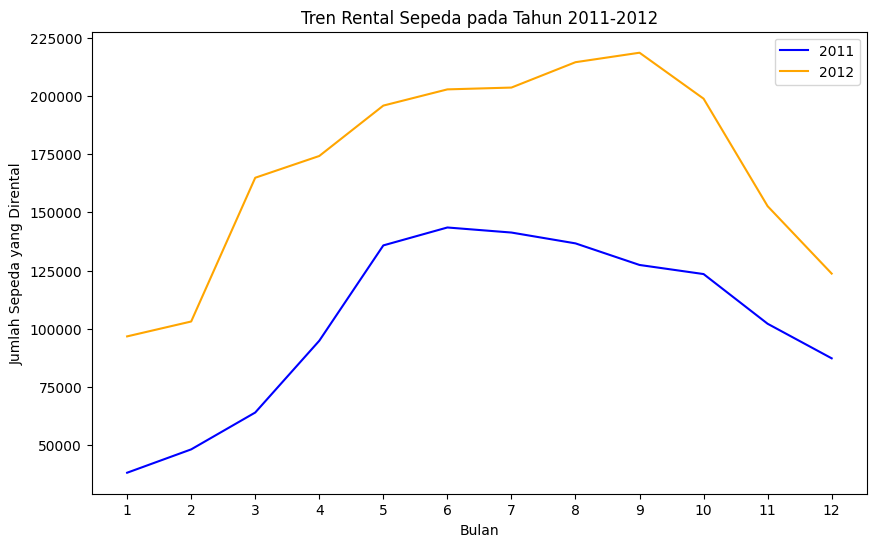

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='total_count', hue='year', data=total_count_by_year, palette=['blue', 'orange'], markers=['o', 's'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda yang Dirental')
plt.title('Tren Rental Sepeda pada Tahun 2011-2012')
plt.legend(loc='upper right')
plt.xticks(range(1, 13))
plt.show()

### Pertanyaan 2 : Bagaimana total sepeda yang dirental berubah sepanjang hari dalam seminggu?

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\770835361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weekday = all_df.groupby('weekday')['total_count'].mean()
C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\770835361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y=avg_weekday, palette=['gray' if x != max(avg_weekday) else 'orange' for x in avg_weekday])


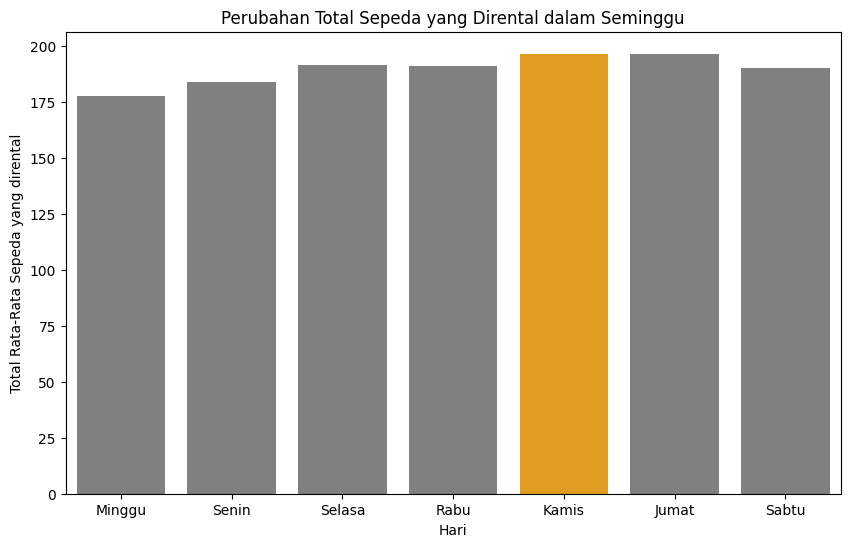

In [102]:
category = ['Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu']
avg_weekday = all_df.groupby('weekday')['total_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=category, y=avg_weekday, palette=['gray' if x != max(avg_weekday) else 'orange' for x in avg_weekday])
plt.xlabel('Hari')
plt.ylabel('Total Rata-Rata Sepeda yang dirental')
plt.title('Perubahan Total Sepeda yang Dirental dalam Seminggu')
plt.show()

### Pertanyaan 3 : Apakah ada perbedaan dalam perilaku penggunaan rental sepeda antara antara hari libur dan hari biasa?

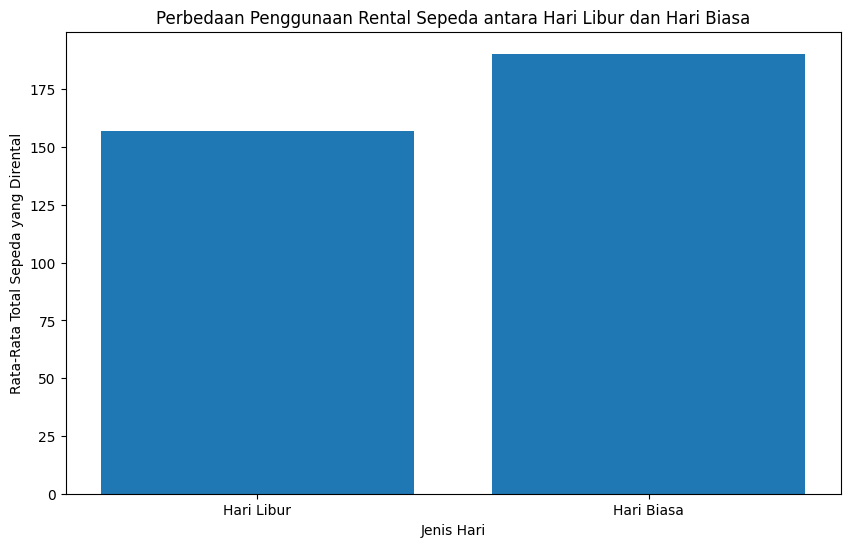

In [103]:

avg_holiday = df[df['holiday'] == 1]['total_count'].mean()
avg_non_holiday = df[df['holiday'] == 0]['total_count'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Hari Libur', 'Hari Biasa'], [avg_holiday, avg_non_holiday])
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-Rata Total Sepeda yang Dirental')
plt.title('Perbedaan Penggunaan Rental Sepeda antara Hari Libur dan Hari Biasa')
plt.show()

### Pertanyaan 4 : Bagaimana musim dan jam harian mempengaruhi total rental sepeda?

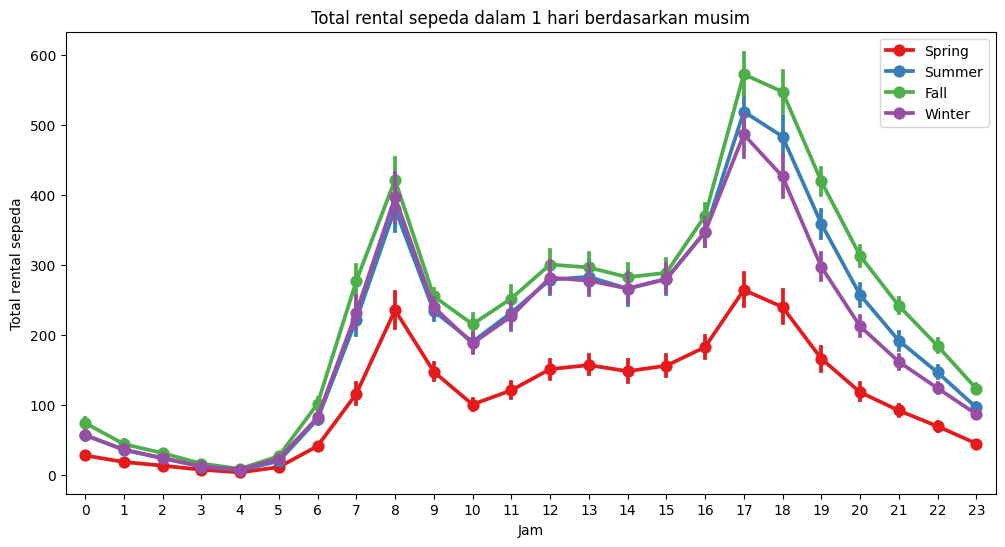

In [104]:
fig,ax = plt.subplots(figsize=(12, 6))
sns.pointplot(data=all_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax, palette='Set1')
ax.set(title="Total rental sepeda dalam 1 hari berdasarkan musim")
ax.set_xlabel('Jam')
ax.set_ylabel('Total rental sepeda')
ax.legend(loc='upper right')
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Dilihat dari trennya, jumlah sharing-bike di 2012 meningkat daripada 2011
- Rata-rata jumlah sepeda yang dirental hampir sama setiap harinya dalam satu minggu
- Terdapat perbedaan rata-rata yang cukup jauh antara jumlah sepeda yang dirental hari libur dan hari biasa
- Distribusi jam harian dari total rental sepeda paling tinggi ada di musim gugur, puncaknya di jam 18

## Analis Lanjutan

### Pertanyaan 5 : Bagaimana suhu mempengaruhi banyaknya sepeda yang dirental?

C:\Users\Viviana Purba\AppData\Local\Temp\ipykernel_18320\2614475747.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_mean = all_df.groupby('temp_group')['total_count'].mean()


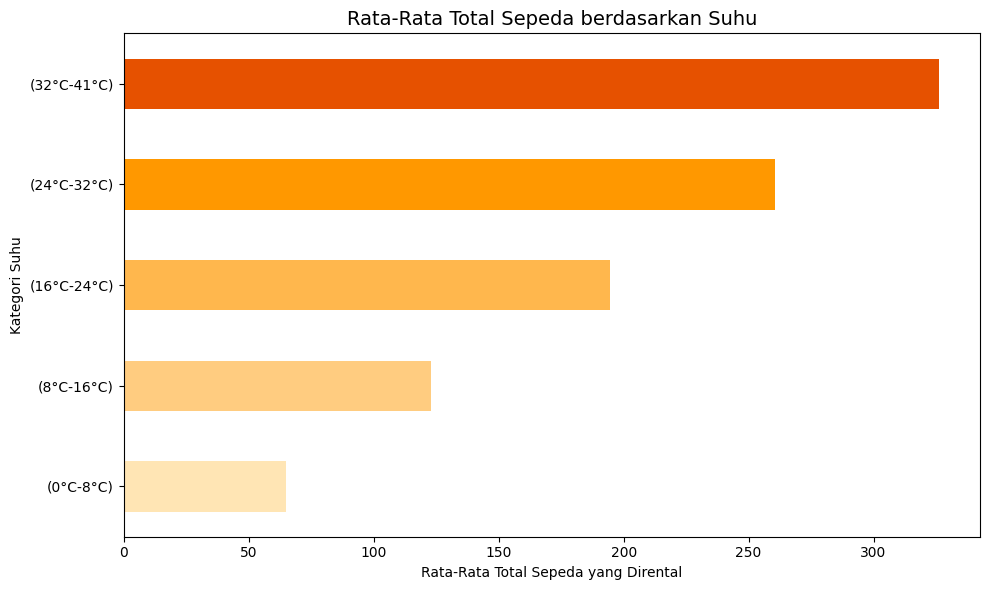

In [105]:
# binning untuk melihat suhu dengan jumlah rental terbanyak
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  #
labels = ['(0°C-8°C)', '(8°C-16°C)', '(16°C-24°C)', '(24°C-32°C)', '(32°C-41°C)']

all_df['temp_group'] = pd.cut(all_df['temp'], bins=bins, labels=labels)
temp_mean = all_df.groupby('temp_group')['total_count'].mean()

plt.figure(figsize=(10, 6))
temp_mean.plot(kind='barh', color=["#FFE5B4", "#FFCC80", "#FFB74D", "#FF9800", "#E65100"])
plt.ylabel('Kategori Suhu')
plt.xlabel('Rata-Rata Total Sepeda yang Dirental')
plt.title('Rata-Rata Total Sepeda berdasarkan Suhu', fontsize=14)
plt.tight_layout()
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Tren rental sepeda selama 2 tahun ini adalah meningkat di awal tahun, lalu menurun di akhir tahun. Total sepeda yang dirental tahun 2012 juga mengalami peningkatan yang signifikan dari tahun sebelumnya yaitu 2011.
- Conclusion pertanyaan 2 : Total rata-rata sepeda yang dirental hampir sama setiap harinya dalam seminggu. Namun total tertinggi ada di hari kamis
- Conclusion pertanyaan 3 : Berdasarkan nilai rata-ratanya, total sepeda dirental paling banyak adalah hari biasa atau ketika tidak libur.
- Conclusion pertanyaan 4 : Total sepeda yang di rental terbanyak ada di hari musim gugur dan paling sedikit di musim semi. Dalam satu hari, puncaknya sepeda dirental terbanyak pada jam 16 dan 17, dan selanjutnya menurun
- Conclusion pertanyaan 5 : Semakin maksimal suhunya, semakin banyak juga jumlah sepeda yang di rental, terbukti dengan total rental tertinggi adalah pada saat suhu berkisar 32-41 derajat celcius